Plots to show how the methods work for highly eccentric seob waveforms

In [1]:
import sys
sys.path.append("../../")
%load_ext autoreload
%autoreload 2

In [82]:
from measureEccentricity.measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform
from measureEccentricity.plot_settings import use_fancy_plotsettings, colorsDict, figWidthsOneColDict, lstyles, lwidths
import matplotlib.pyplot as plt
import numpy as np
from measureEccentricity.utils import get_peak_via_quadratic_fit
import matplotlib as mpl

### Create eccentric waveforms using seobnrv4ehm

In [3]:
from EccTests.TestEOBvsMeasuredEcc.seobnrv4ehm import get_modes
import lal

In [4]:
?get_modes

Signature:
get_modes(
    q=1,
    chi1=0,
    chi2=0,
    eccentricity=1e-05,
    eccentric_anomaly=0,
    f_min=20,
    M_fed=50,
    delta_t=0.00048828125,
    EccIC=0,
    dMpc=500,
    approx='SEOBNRv4EHM_opt',
    physical_units=True,
    save=True,
)
Docstring: Get the hlm modes.
File:      ~/Eccentricity/EccTests/TestEOBvsMeasuredEcc/seobnrv4ehm.py
Type:      function


In [30]:
M = 50
MT = M * lal.MTSUN_SI
q = 4
chi1 = -0.6
chi2=-0.6
eccentric_anomaly=np.pi/2
EccIC=-1
Momega0_zeroecc = 0.002
f_low_zeroecc = Momega0_zeroecc/np.pi/MT
tzeroecc, hlmzeroecc = get_modes(q=q, chi1=chi1, chi2=chi2, M_fed=M, eccentricity=0, eccentric_anomaly=eccentric_anomaly, EccIC=EccIC, f_min=f_low_zeroecc, physical_units=False, save=False)
tzeroecc = tzeroecc - get_peak_via_quadratic_fit(tzeroecc, np.abs(hlmzeroecc[(2, 2)]))[0]
    
def getDataDict(Momega0, ecc):
    f_low = Momega0/np.pi/MT
    tecc, hlmecc = get_modes(q=4, chi1=chi1, chi2=chi2, M_fed=M, eccentricity=ecc, eccentric_anomaly=eccentric_anomaly, EccIC=EccIC, f_min=f_low, physical_units=False, save=False)
    tecc = tecc - get_peak_via_quadratic_fit(tecc, np.abs(hlmecc[(2, 2)]))[0]
    startzero = np.argmin(np.abs(tzeroecc - tecc[0])) - 10
    dataDict = {"t": tecc, "hlm": hlmecc, "t_zeroecc": tzeroecc[startzero:], "hlm_zeroecc":{(2, 2): hlmzeroecc[(2, 2)][startzero: ]}}
    return dataDict

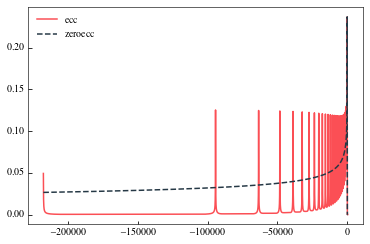

In [33]:
datadict = getDataDict(0.01, 1)
plt.plot(datadict["t"], np.abs(datadict["hlm"][(2, 2)]), label="ecc")
plt.plot(datadict["t_zeroecc"], np.abs(datadict["hlm_zeroecc"][(2, 2)]), label="zeroecc", ls="--")
plt.legend()

In [34]:
journal = "APS"
use_fancy_plotsettings(journal=journal)

In [37]:
from tqdm import tqdm

### Test the `ResidualAmplitude` method from ecc=1e-7 to ecc=1 with `treat_mid_points_between_peaks_as_troughs=True` and `False`

In [70]:
eobEccs = 10**np.linspace(-7, 0., 150)
method = "ResidualAmplitude"
measuredEccsTrue = []
eEOBTrue = []
measuredEccsFalse = []
eEOBFalse = []
for EOBecc in tqdm(eobEccs):
    print(EOBecc)
    dataDict = getDataDict(0.01, EOBecc)
    tref_in = dataDict["t"] - get_peak_via_quadratic_fit(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]))[0]
    for case in [True, False]:
        try:
            tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                        dataDict=dataDict,
                                                        method=method,
                                                        return_ecc_method=True,
                                                        extra_kwargs={"treat_mid_points_between_peaks_as_troughs": case})
            if case:
                measuredEccsTrue.append(ecc[0])
                eEOBTrue.append(EOBecc)
            else:
                measuredEccsFalse.append(ecc[0])
                eEOBFalse.append(EOBecc)
        except Exception:
            print(f"failed for {EOBecc} for {method}.")

  1%|█▏                                                                                                                                                                            | 1/150 [00:01<04:36,  1.86s/it]

1e-07
1.1142428752325099e-07


  1%|██▎                                                                                                                                                                           | 2/150 [00:03<04:40,  1.90s/it]

1.2415371850064104e-07


  2%|███▍                                                                                                                                                                          | 3/150 [00:05<04:56,  2.02s/it]

1.3833739627296223e-07


  3%|████▋                                                                                                                                                                         | 4/150 [00:08<05:02,  2.07s/it]

1.5414145817536454e-07


  3%|█████▊                                                                                                                                                                        | 5/150 [00:10<05:05,  2.11s/it]

1.7175102154984983e-07


  4%|██████▉                                                                                                                                                                       | 6/150 [00:12<05:05,  2.12s/it]

1.9137235207582544e-07


  5%|████████                                                                                                                                                                      | 7/150 [00:14<05:03,  2.12s/it]

2.1323527981697593e-07


  5%|█████████▎                                                                                                                                                                    | 8/150 [00:16<05:01,  2.12s/it]

2.3759589128427652e-07


  6%|██████████▍                                                                                                                                                                   | 9/150 [00:18<04:58,  2.12s/it]

2.647395290480231e-07


  7%|███████████▌                                                                                                                                                                 | 10/150 [00:20<04:55,  2.11s/it]

2.949841340341698e-07


  7%|████████████▋                                                                                                                                                                | 11/150 [00:22<04:51,  2.10s/it]

3.286839696542055e-07


  8%|█████████████▊                                                                                                                                                               | 12/150 [00:25<04:48,  2.09s/it]

3.662337713903369e-07


  9%|██████████████▉                                                                                                                                                              | 13/150 [00:26<04:33,  1.99s/it]

4.0807337044121557e-07


  9%|████████████████▏                                                                                                                                                            | 14/150 [00:28<04:18,  1.90s/it]

4.5469284558624114e-07


 10%|█████████████████▎                                                                                                                                                           | 15/150 [00:30<04:07,  1.83s/it]

5.066382636136649e-07


 11%|██████████████████▍                                                                                                                                                          | 16/150 [00:31<03:59,  1.79s/it]

5.645180755516963e-07


 11%|███████████████████▌                                                                                                                                                         | 17/150 [00:33<03:54,  1.77s/it]

6.290102436234467e-07


 12%|████████████████████▊                                                                                                                                                        | 18/150 [00:35<03:49,  1.74s/it]

7.008701824056906e-07


 13%|█████████████████████▉                                                                                                                                                       | 19/150 [00:36<03:46,  1.73s/it]

7.809396072084504e-07


 13%|███████████████████████                                                                                                                                                      | 20/150 [00:38<03:49,  1.77s/it]

8.701563933188907e-07


 14%|████████████████████████▏                                                                                                                                                    | 21/150 [00:40<03:43,  1.73s/it]

9.695655615935915e-07


 15%|█████████████████████████▎                                                                                                                                                   | 22/150 [00:42<03:39,  1.72s/it]

1.0803315190764665e-06


 15%|██████████████████████████▌                                                                                                                                                  | 23/150 [00:43<03:35,  1.70s/it]

1.2037516980200695e-06


 16%|███████████████████████████▋                                                                                                                                                 | 24/150 [00:45<03:32,  1.69s/it]

1.3412717530678983e-06


 17%|████████████████████████████▊                                                                                                                                                | 25/150 [00:47<03:30,  1.68s/it]

1.494502494606524e-06


 17%|█████████████████████████████▉                                                                                                                                               | 26/150 [00:48<03:28,  1.68s/it]

1.665238756632532e-06


 18%|███████████████████████████████▏                                                                                                                                             | 27/150 [00:50<03:26,  1.68s/it]

1.8554804201388458e-06


 19%|████████████████████████████████▎                                                                                                                                            | 28/150 [00:52<03:24,  1.68s/it]

2.067455838273133e-06


 19%|█████████████████████████████████▍                                                                                                                                           | 29/150 [00:53<03:25,  1.70s/it]

2.3036479376536947e-06


 20%|██████████████████████████████████▌                                                                                                                                          | 30/150 [00:55<03:27,  1.73s/it]

2.5668233015746943e-06


 21%|███████████████████████████████████▊                                                                                                                                         | 31/150 [00:57<03:23,  1.71s/it]

2.8600645757603915e-06


 21%|████████████████████████████████████▉                                                                                                                                        | 32/150 [00:59<03:20,  1.70s/it]

3.186806576245907e-06


 22%|██████████████████████████████████████                                                                                                                                       | 33/150 [01:00<03:18,  1.70s/it]

3.5508765223261173e-06


 23%|███████████████████████████████████████▏                                                                                                                                     | 34/150 [01:02<03:16,  1.69s/it]

3.956538865832268e-06


 23%|████████████████████████████████████████▎                                                                                                                                    | 35/150 [01:04<03:14,  1.69s/it]

4.40854524183412e-06


 24%|█████████████████████████████████████████▌                                                                                                                                   | 36/150 [01:05<03:12,  1.69s/it]

4.912190125853851e-06


 25%|██████████████████████████████████████████▋                                                                                                                                  | 37/150 [01:07<03:10,  1.69s/it]

5.47337284952015e-06


 25%|███████████████████████████████████████████▊                                                                                                                                 | 38/150 [01:09<03:09,  1.69s/it]

6.098666701068888e-06


 26%|████████████████████████████████████████████▉                                                                                                                                | 39/150 [01:10<03:11,  1.72s/it]

6.795395920083764e-06


 27%|██████████████████████████████████████████████▏                                                                                                                              | 40/150 [01:12<03:13,  1.76s/it]

7.5717214883374e-06


 27%|███████████████████████████████████████████████▎                                                                                                                             | 41/150 [01:14<03:10,  1.75s/it]

8.436736721624844e-06


 28%|████████████████████████████████████████████████▍                                                                                                                            | 42/150 [01:16<03:07,  1.74s/it]

9.400573782282964e-06


 29%|█████████████████████████████████████████████████▌                                                                                                                           | 43/150 [01:17<03:05,  1.73s/it]

1.047452236000632e-05


 29%|██████████████████████████████████████████████████▋                                                                                                                          | 44/150 [01:19<03:03,  1.73s/it]

1.1671161911100682e-05


 30%|███████████████████████████████████████████████████▉                                                                                                                         | 45/150 [01:21<03:02,  1.74s/it]

1.3004509005128978e-05


 31%|█████████████████████████████████████████████████████                                                                                                                        | 46/150 [01:23<03:01,  1.75s/it]

1.4490181504862008e-05


 31%|██████████████████████████████████████████████████████▏                                                                                                                      | 47/150 [01:24<03:00,  1.76s/it]

1.614558150261838e-05


 32%|███████████████████████████████████████████████████████▎                                                                                                                     | 48/150 [01:26<02:59,  1.76s/it]

1.7990099155778334e-05


 33%|████████████████████████████████████████████████████████▌                                                                                                                    | 49/150 [01:28<03:00,  1.79s/it]

2.00453398090524e-05


 33%|█████████████████████████████████████████████████████████▋                                                                                                                   | 50/150 [01:30<03:02,  1.83s/it]

2.2335377063851234e-05


 34%|██████████████████████████████████████████████████████████▊                                                                                                                  | 51/150 [01:32<03:00,  1.82s/it]

2.4887034759027854e-05


 35%|███████████████████████████████████████████████████████████▉                                                                                                                 | 52/150 [01:34<03:04,  1.89s/it]

2.7730201165910607e-05


 35%|█████████████████████████████████████████████████████████████▏                                                                                                               | 53/150 [01:36<03:06,  1.92s/it]

3.08981790778802e-05


 36%|██████████████████████████████████████████████████████████████▎                                                                                                              | 54/150 [01:38<03:02,  1.90s/it]

3.442807589518621e-05


 37%|███████████████████████████████████████████████████████████████▍                                                                                                             | 55/150 [01:40<02:58,  1.88s/it]

3.836123827417535e-05


 37%|████████████████████████████████████████████████████████████████▌                                                                                                            | 56/150 [01:42<02:58,  1.90s/it]

4.274373643209663e-05


 38%|█████████████████████████████████████████████████████████████████▋                                                                                                           | 57/150 [01:44<03:00,  1.94s/it]

4.762690378027994e-05


 39%|██████████████████████████████████████████████████████████████████▉                                                                                                          | 58/150 [01:45<02:57,  1.93s/it]

5.306793820656121e-05


 39%|████████████████████████████████████████████████████████████████████                                                                                                         | 59/150 [01:47<02:55,  1.93s/it]

5.913057204993993e-05


 40%|█████████████████████████████████████████████████████████████████████▏                                                                                                       | 60/150 [01:49<02:53,  1.93s/it]

6.588581861506814e-05


 41%|██████████████████████████████████████████████████████████████████████▎                                                                                                      | 61/150 [01:51<02:52,  1.94s/it]

7.341280397070115e-05


 41%|███████████████████████████████████████████████████████████████████████▌                                                                                                     | 62/150 [01:53<02:51,  1.95s/it]

8.179969377519468e-05


 42%|████████████████████████████████████████████████████████████████████████▋                                                                                                    | 63/150 [01:55<02:50,  1.96s/it]

9.114472598521194e-05


 43%|█████████████████████████████████████████████████████████████████████████▊                                                                                                   | 64/150 [01:57<02:50,  1.98s/it]

0.0001015573615440418


 43%|██████████████████████████████████████████████████████████████████████████▉                                                                                                  | 65/150 [01:59<02:49,  2.00s/it]

0.00011315956652786067


 44%|████████████████████████████████████████████████████████████████████████████                                                                                                 | 66/150 [02:01<02:49,  2.02s/it]

0.0001260872407680681


 45%|█████████████████████████████████████████████████████████████████████████████▎                                                                                               | 67/150 [02:03<02:48,  2.03s/it]

0.00014049180968354593


 45%|██████████████████████████████████████████████████████████████████████████████▍                                                                                              | 68/150 [02:06<02:48,  2.05s/it]

0.00015654199796841294


 46%|███████████████████████████████████████████████████████████████████████████████▌                                                                                             | 69/150 [02:08<02:47,  2.07s/it]

0.00017442580591096616


 47%|████████████████████████████████████████████████████████████████████████████████▋                                                                                            | 70/150 [02:10<02:47,  2.09s/it]

0.00019435271149298265


 47%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                           | 71/150 [02:12<02:47,  2.11s/it]

0.00021655612406317566


 48%|███████████████████████████████████████████████████████████████████████████████████                                                                                          | 72/150 [02:14<02:46,  2.14s/it]

0.00024129611832536096


 49%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 73/150 [02:16<02:45,  2.16s/it]

0.0002688624806652944


 49%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 74/150 [02:19<02:45,  2.18s/it]

0.0002995781034986427


 50%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 75/150 [02:21<02:44,  2.20s/it]

0.0003338027673990301


 51%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 76/150 [02:23<02:44,  2.22s/it]

0.0003719373553072644


 51%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 77/150 [02:25<02:43,  2.25s/it]

0.00041442854818394187


 52%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 78/150 [02:28<02:43,  2.27s/it]

0.00046177405710691065


 53%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                  | 79/150 [02:30<02:42,  2.29s/it]

0.0005145284530985853


 53%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 80/150 [02:32<02:41,  2.31s/it]

0.0005733096629695033


 54%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                               | 81/150 [02:35<02:41,  2.34s/it]

0.0006388062072657212


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 82/150 [02:37<02:40,  2.36s/it]

0.0007117852651001318


 55%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                             | 83/150 [02:40<02:39,  2.39s/it]

0.000793101660333306


 56%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 84/150 [02:42<02:39,  2.41s/it]

0.0008837078743614603


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                           | 85/150 [02:45<02:38,  2.44s/it]

0.0009846652027941242


 57%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 86/150 [02:47<02:38,  2.47s/it]

0.0010971561867027262


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 87/150 [02:50<02:37,  2.50s/it]

0.0012224984640507844


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 88/150 [02:52<02:36,  2.53s/it]

0.0013621602035512731


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 89/150 [02:55<02:35,  2.56s/it]

0.0015177773017322714


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 90/150 [02:58<02:35,  2.59s/it]

0.0016911725446448068


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 91/150 [03:00<02:34,  2.62s/it]

0.0018843769586593098


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 92/150 [03:03<02:33,  2.65s/it]

0.002099653600438446


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 93/150 [03:06<02:32,  2.68s/it]

0.0023395240647448253


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 94/150 [03:09<02:31,  2.71s/it]

0.002606798020576923


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 95/150 [03:11<02:31,  2.75s/it]

0.002904606121598046


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 96/150 [03:15<02:34,  2.86s/it]

0.0032364366763473628


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 97/150 [03:18<02:35,  2.93s/it]

0.0036061765077612332


 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 98/150 [03:21<02:32,  2.93s/it]

0.004018156480603808


 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 99/150 [03:24<02:30,  2.95s/it]

0.00447720223008213


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 100/150 [03:27<02:28,  2.96s/it]

0.004988690685844118


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 101/150 [03:30<02:26,  3.00s/it]

0.005558613053440603


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 102/150 [03:33<02:25,  3.03s/it]

0.006193644990970618


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 103/150 [03:36<02:23,  3.06s/it]

0.006901224802908534


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 104/150 [03:39<02:22,  3.09s/it]

0.007689640567018716


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 105/150 [03:42<02:20,  3.13s/it]

0.008568127214899482


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 106/150 [03:45<02:19,  3.17s/it]

0.009546974703287536


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 107/150 [03:49<02:18,  3.21s/it]

0.01063764854316314


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 108/150 [03:52<02:16,  3.25s/it]

0.011852924098447019


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 109/150 [03:56<02:15,  3.30s/it]

0.01320703622736631


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 110/150 [03:59<02:13,  3.34s/it]

0.014715846019280557


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 111/150 [04:02<02:11,  3.38s/it]

0.016397026580002087


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 112/150 [04:06<02:10,  3.43s/it]

0.018270270041765412


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 113/150 [04:10<02:10,  3.53s/it]

0.020357518222611084


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 114/150 [04:13<02:08,  3.56s/it]

0.022683219636960388


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 115/150 [04:17<02:05,  3.59s/it]

0.02527461586781727


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 116/150 [04:21<02:03,  3.63s/it]

0.02816206065495399


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 117/150 [04:25<02:01,  3.68s/it]

0.031379375436648274


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 118/150 [04:28<01:58,  3.72s/it]

0.034964245509531366


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 119/150 [04:32<01:56,  3.77s/it]

0.038958661446875605


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 120/150 [04:36<01:54,  3.83s/it]

0.043409410945776605


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 121/150 [04:40<01:52,  3.89s/it]

0.04836862686437181


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 122/150 [04:44<01:50,  3.94s/it]

0.053894397868406066


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 123/150 [04:49<01:48,  4.01s/it]

0.060051448839817625


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 124/150 [04:53<01:45,  4.07s/it]

0.06691189901715636


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 125/150 [04:57<01:43,  4.14s/it]

0.07455610674814366


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 126/150 [05:01<01:41,  4.21s/it]

0.08307361074919369


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 127/150 [05:06<01:38,  4.28s/it]

0.09256417889712791


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 128/150 [05:10<01:36,  4.37s/it]

0.10313897683787221


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 129/150 [05:15<01:33,  4.44s/it]

0.11492187010036997


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 130/150 [05:20<01:30,  4.51s/it]

0.12805087496773324


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 131/150 [05:24<01:27,  4.59s/it]

0.142679775100086


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 132/150 [05:29<01:23,  4.66s/it]

0.1589799228450477


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 133/150 [05:34<01:20,  4.75s/it]

0.17714224633510853


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 134/150 [05:39<01:17,  4.83s/it]

0.19737948588157686


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 135/150 [05:44<01:13,  4.92s/it]

0.2199286858606028


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 136/150 [05:50<01:10,  5.01s/it]

0.24505397127942602


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 137/150 [05:55<01:06,  5.10s/it]

0.2730496415455325


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 138/150 [06:00<01:02,  5.19s/it]

0.30424361767690034


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 139/150 [06:06<00:58,  5.29s/it]

0.3390012833314499


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 140/150 [06:11<00:53,  5.37s/it]

0.37772976464674546


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 141/150 [06:17<00:49,  5.47s/it]

0.42088269902088976


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 142/150 [06:23<00:44,  5.56s/it]

0.4689655486926553


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 143/150 [06:29<00:39,  5.66s/it]

0.5225415213602959


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 144/150 [06:35<00:34,  5.76s/it]

0.582238167188866


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 145/150 [06:41<00:29,  5.86s/it]

0.6487547294786289


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 146/150 [06:47<00:23,  5.97s/it]

0.722870335094958


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 147/150 [06:54<00:18,  6.10s/it]

0.8054531205964939


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 148/150 [07:00<00:12,  6.26s/it]

0.8974704009584349


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 149/150 [07:07<00:06,  6.53s/it]

1.0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [07:17<00:00,  2.92s/it]


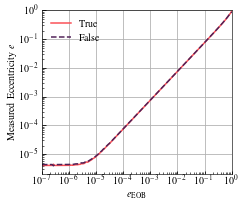

In [83]:
fig, ax = plt.subplots(figsize=(figWidthsOneColDict[journal], 3))
if len(measuredEccsTrue) >= 1:
    ax.plot(eEOBTrue, measuredEccsTrue, label=f"True", ls="-")
if len(measuredEccsFalse) >= 1:
    ax.plot(eEOBFalse, measuredEccsFalse, label=f"False", c=colorsDict[method], ls="--")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("$e_{\mathrm{EOB}}$")
ax.set_ylabel("Measured Eccentricity $e$")
ax.legend()
ax.set_ylim(top=1.0)
ax.set_xlim(left=1e-7, right=1.0)
# set major ticks
locmaj = mpl.ticker.LogLocator(base=10, numticks=20)
ax.xaxis.set_major_locator(locmaj)
# set minor ticks
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(0.1, 1.0, 0.1),
                                numticks=20)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.grid(which="major")
ax.legend()

In [85]:
fig.subplots_adjust(left=0.16, right=0.96, top=0.98)
fig.savefig("../../../public_html/EccDefinition/test_eob_vs_measured_ecc_resamp_compare.pdf")

### Test for high ecc

/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:425: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:370: UserWarning: Phase shift closer to pi than 2 pi detected.
  warnings.warn("Phase shift closer to pi than 2 pi detected.")
/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:382: UserWarning: At least a pair of peaks are too far. Maximum orbital phase diff is 10.790380395400291. Times of occurances are [-36212.12625994]
  warnings.warn(f"At least a pair of {extrema_type} are too far."
/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:382: UserWarning: At least a pair of peaks are too far. Maximum orbital phase diff is 11.206740051356917. Times of occurances are [-33835.63411971]
  warnings.warn(f"At least a pair of {extrema_type} are 

failed for 0.5416666666666666 for FrequencyFits.
failed for 0.625 for FrequencyFits.
failed for 0.6875 for FrequencyFits.
failed for 0.75 for FrequencyFits.
failed for 0.7708333333333333 for FrequencyFits.
failed for 0.8333333333333333 for FrequencyFits.
failed for 0.8958333333333333 for FrequencyFits.
failed for 0.9166666666666666 for FrequencyFits.
failed for 0.9583333333333333 for FrequencyFits.
failed for 0.9791666666666666 for FrequencyFits.
failed for 1.0 for FrequencyFits.


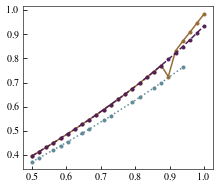

In [23]:
fig, ax = plt.subplots(figsize=(figWidthsOneColDict[journal], 3))
eobEccs = np.linspace(0.5, 1., 25)
for method in ["Amplitude", "ResidualAmplitude", "FrequencyFits"]:
    measuredEccs = []
    eEOB = []
    for EOBecc in eobEccs:
        dataDict = getDataDict(0.01, EOBecc)
        tref_in = dataDict["t"] - get_peak_via_quadratic_fit(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]))[0]
        try:
            tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                        dataDict=dataDict,
                                                        method=method,
                                                        return_ecc_method=True,
                                                        extra_kwargs={"treat_mid_points_between_peaks_as_troughs": True})
            measuredEccs.append(ecc[0])
            eEOB.append(EOBecc)
        except Exception:
            print(f"failed for {EOBecc} for {method}.")
    if len(measuredEccs) >= 1:
        ax.plot(eEOB, measuredEccs, marker=".", label=f"{method}", c=colorsDict[method], ls=lstyles[method])

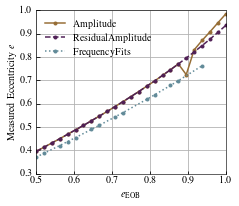

In [24]:
ax.set_xlabel("$e_{\mathrm{EOB}}$")
ax.set_ylabel("Measured Eccentricity $e$")
ax.legend()
ax.set_ylim(0.3, 1.0)
ax.set_xlim(0.5, 1.0)
ax.grid()
fig

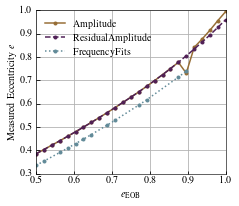

In [18]:
ax.set_xlabel("$e_{\mathrm{EOB}}$")
ax.set_ylabel("Measured Eccentricity $e$")
ax.legend()
ax.set_ylim(0.3, 1.0)
ax.set_xlim(0.5, 1.0)
ax.grid()
fig

In [19]:
fig.subplots_adjust(right=0.96, top=0.98)
fig.savefig("../../../public_html/EccDefinition/high_ecc_test.pdf")

In [66]:
# fig.subplots_adjust(left=0.15, bottom=0.13, right=0.98, top=0.91, hspace=0.12)
# fig.savefig("../figs/ecc_and_zero_ecc.pdf")

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5191199e50>)

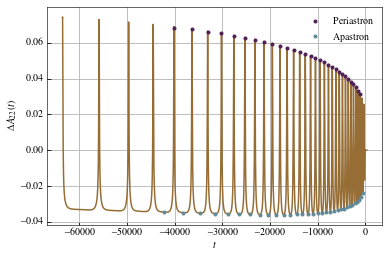

In [67]:
eccMethod.plot_residual_amp22()

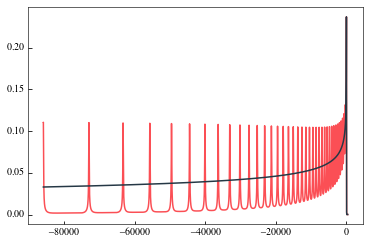

In [62]:
plt.plot(eccMethod.t, eccMethod.amp22)
plt.plot(eccMethod.t, eccMethod.amp22_zeroecc_interp)

In [41]:
ecc_in = 1e-7
dataDict = getDataDict(0.01, ecc_in)
tref_in = dataDict["t"] - get_peak_via_quadratic_fit(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]))[0]
tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                     dataDict=dataDict,
                                                     method="ResidualAmplitude",
                                                     return_ecc_method=True,
                                                    extra_kwargs={'extrema_finding_kwargs': {"width": 25},
                                                                 "treat_mid_points_between_peaks_as_troughs": True})

/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:425: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")


In [42]:
# !pip install ipympl
# %matplotlib widget

(-20000.0, -10000.0)

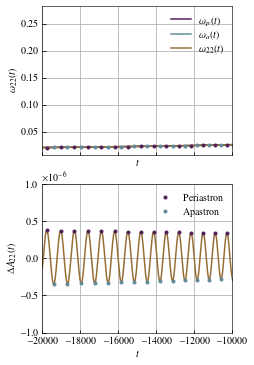

In [46]:
fig, ax = plt.subplots(nrows=2, figsize=(figWidthsOneColDict[journal], 6), sharex=True)
eccMethod.plot_extrema_in_omega22(fig, ax[0])
# ax[0].set_ylim(0.0, 0.07)
# ax[0].set_xlim(right=-40000)

eccMethod.plot_residual_amp22(fig, ax[1])
ax[1].set_ylim(-1e-6, 1e-6)
ax[1].set_xlim(-20000, -10000)
# ax[1].set_ylim(-0.0331, -0.0330)

In [23]:
# fig.subplots_adjust(left=0.2, bottom=0.07, top=0.98, right=0.95, hspace=0.1)
# fig.savefig("../../../public_html/EccDefinition/debug_high_ecc_amp.pdf")

In [24]:
eccMethod.extra_kwargs

{'extrema_finding_kwargs': {'width': 25,
  'height': None,
  'threshold': None,
  'distance': None,
  'prominence': None,
  'wlen': None,
  'rel_height': 0.5,
  'plateau_size': None},
 'treat_mid_points_between_peaks_as_troughs': True,
 'num_orbits_to_exclude_before_merger': 1,
 'debug': True,
 'omega22_averaging_method': 'average_between_extrema'}